#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Práctica 8: Metricas de regresión (evaluando para diferentes tipos de modelos de regresión para la dataset de diabetes) Alumno: Ibarra Ramírez Sergio </font>

Para comparar los diferentes tipos de modelos de Regresión se trabajará con el Dataset de diabetes y y se intentará hacer una predicicón de la variable target (y), usando los diferentes modelos y evaluando las métricas (R2, R2_ajustado, MAE, MAPE, MSE y RMSE)

Importamos entonces la data de diabetes con la que trabajeremos en todos los modelos  

In [1]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes(as_frame=True)
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

Se separa la variable dependiente Y de las independientes y hace el split de train y test  

In [2]:

## Vartiable dependiente
y_diabetes = diabetes['target']


## Vartiables independientes
X_diabetes = diabetes['data']


## Separacion en train y test 
from sklearn.model_selection import train_test_split

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes,y_diabetes,test_size=0.2,random_state=2023)
X_diabetes_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
318,0.088931,-0.044642,0.006728,0.025315,0.030078,0.008707,0.063367,-0.039493,0.009434,0.032059
301,-0.001882,0.050680,-0.024529,0.052858,0.027326,0.030001,0.030232,-0.002592,-0.021395,0.036201
189,-0.001882,-0.044642,-0.066563,0.001215,-0.002945,0.003070,0.011824,-0.002592,-0.020292,-0.025930
288,0.070769,0.050680,-0.016984,0.021872,0.043837,0.056305,0.037595,-0.002592,-0.070209,-0.017646
...,...,...,...,...,...,...,...,...,...,...
220,0.023546,0.050680,-0.039618,-0.005670,-0.048351,-0.033255,0.011824,-0.039493,-0.101640,-0.067351
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
183,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015568,0.056912
25,-0.067268,0.050680,-0.012673,-0.040099,-0.015328,0.004636,-0.058127,0.034309,0.019196,-0.034215


### Para modelo Regresión Lineal Simple  

Se define y entrena el modelo linear_model, además de calcular los valores predichos 

In [4]:
from sklearn import linear_model

modelo_lineal_simple = linear_model.LinearRegression()
modelo_lineal_simple.fit(X_diabetes_train,y_diabetes_train)

y_pred_modelo_lineal_simple = modelo_lineal_simple.predict(X_diabetes_test)
y_pred_modelo_lineal_simple

array([164.55373422, 230.85851626, 113.38907917, 204.74116814,
       105.52033577, 181.94343833,  82.00806999,  80.44200645,
       131.11334734, 229.23179863,  64.57813456,  87.41220532,
        62.10905263, 185.67733585, 167.61767614, 112.95971024,
       134.31271633,  86.09584758, 211.57673686, 180.55183129,
        98.68632823, 162.10216242, 135.62768379, 116.78745979,
       132.63301895, 145.35430667, 183.40345264, 126.94847342,
       186.85842312, 116.67929912, 112.94997783, 102.34041042,
       218.79109715, 159.57945047, 211.26980683, 256.18130253,
       200.77215919, 159.41401685, 164.80825925, 196.08702759,
        93.79690234, 119.72402729, 122.30602092, 262.25806711,
       274.20992694,  64.31380709, 131.68679794,  99.26899165,
       251.70106532, 110.30732844, 137.84979152, 169.1755417 ,
       146.80923048, 204.35630293, 219.58742135, 114.73124039,
       245.37669038,  61.81665768, 252.75979509, 165.91501184,
        99.03083736,  54.56254085,  60.32039683, 102.17

##### Evaluación del coeficiente de detemrinación (R^2 ) [para el caso del modelo_lineal_simple para dataset de diabetes]

In [9]:
from sklearn.metrics import r2_score
R2_score_modelo_lineal_simple = r2_score(y_diabetes_test,y_pred_modelo_lineal_simple)
R2_score_modelo_lineal_simple 

0.5011352464069885

##### Evaluación el coeficiente de detemrinación ajustado [para el caso del modelo_lineal_simple para dataset de diabetes]

In [10]:
R2_ajustada_modelo_lineal_simple = 1 -(1-R2_score_modelo_lineal_simple)*(len(y_diabetes_train)-1)/(len(y_diabetes_train)-len(diabetes['feature_names'])-1)
R2_ajustada_modelo_lineal_simple

0.48654855770543837

##### Evaluación de Errores MAE y MAPE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

MAE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [13]:
MAE_modelo_lineal_simple = mean_absolute_error(y_diabetes_test,y_pred_modelo_lineal_simple)
MAE_modelo_lineal_simple

48.15457237383576

MAPE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [14]:
MAPE_modelo_lineal_simple = mean_absolute_percentage_error(y_diabetes_test,y_pred_modelo_lineal_simple)
MAPE_modelo_lineal_simple

0.49435618942943926

##### Evaluación de Errores MSE y RMSE  [para el caso del modelo_lineal_simple para dataset de diabetes]

In [15]:
from sklearn.metrics import mean_squared_error

MSE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [16]:
MSE_modelo_lineal_simple = mean_squared_error(y_diabetes_test,y_pred_modelo_lineal_simple)
MSE_modelo_lineal_simple

3490.250912883901

RMSE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [18]:
RMSE_modelo_lineal_simple = mean_squared_error(y_diabetes_test,y_pred_modelo_lineal_simple,squared=False)
RMSE_modelo_lineal_simple

59.07834554965043

#### En general el  modelo_lineal_simple para dataset de diabetes tiene un R2 ~50% y MAPE de ~50%

### Para modelo Regresión KNN  

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

Vamos a definir los objetos que contendran los modelos k y/o radio específico 

In [32]:
modeloKNN_regression_n5 = KNeighborsRegressor(n_neighbors=5)
modeloR_regression_R10 = RadiusNeighborsRegressor(radius=10)

Se entrenan los modelos modeloKNN_regression & modeloR_regression, además de calcular los valores predichos con cada uno de ellos
(con un n_neighbors=5 y radius=10, respecivamente)  [para el caso de dataset de diabetes]

In [34]:

# Se entrena y aplica el modelo KNN regression a la dataset de diabetes (para un n_neighbors=5)

modeloKNN_regression_n5 = modeloKNN_regression_n5.fit(X_diabetes_train,y_diabetes_train)
y_pred_modeloKNN_regression_n5 = modeloKNN_regression_n5.predict(X_diabetes_test)
y_pred_modeloKNN_regression_n5



# Se entrena y aplica el modelo KNN regression a la dataset de diabetes (para un radius=10)

modeloR_regression_R10 = modeloR_regression_R10.fit(X_diabetes_train,y_diabetes_train)
y_pred_modeloR_regression_R10 = modeloR_regression_R10.predict(X_diabetes_test)
y_pred_modeloR_regression_R10


array([152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94

##### Evaluación del coeficiente de detemrinación (R^2 ) [para el caso del modeloKNN_regression y modeloR_regression  para dataset de diabetes]

- R2 score para el caso del modeloKNN_regression para dataset de diabetes

In [42]:
from sklearn.metrics import r2_score
R2_score_modeloKNN_regression_n5 = r2_score(y_diabetes_test,y_pred_modeloKNN_regression_n5)
R2_score_modeloKNN_regression_n5

0.41554752645070003

Evaluación de diferentes valores de R2 score para diferentes valores de n_neighbors en el caso del modeloKNN_regression para dataset de diabetes

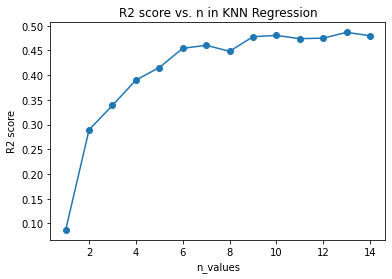

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
n_neighbors_values = np.arange(1, 15)

# Initialize an empty list to store the R2 values
R2_score_values = []

# Loop through each k value
for n in n_neighbors_values:
    # Define the KNN regression model
    modeloK = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    modeloK.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_modeloKNN_regression = modeloK.predict(X_diabetes_test)
    
    # Calculate the R2_score
    R2_score_modeloKNN_regression = r2_score(y_diabetes_test,y_pred_modeloKNN_regression)
   
    
    # Append the RMSE value to the list
    R2_score_values.append(R2_score_modeloKNN_regression)

# Plot the RMSE values against the k values
plt.plot(n_neighbors_values, R2_score_values, marker='o')
plt.xlabel('n_values')
plt.ylabel('R2 score')
plt.title('R2 score vs. n in KNN Regression')
plt.show()

- R2 score para el caso del modeloR_regression para dataset de diabetes

In [40]:
from sklearn.metrics import r2_score
R2_score_modeloR_regression_R10 = r2_score(y_diabetes_test,y_pred_modeloR_regression_R10)
R2_score_modeloR_regression_R10

-0.0023121132781622755

Evaluación de diferentes valores de R2 score para diferentes valores de R_values en el caso del modeloR_regression para dataset de diabetes

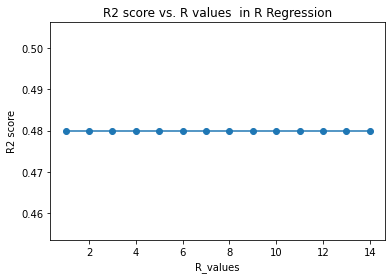

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Define the range of R values
R_values = np.arange(1, 15)


# Initialize an empty list to store the R2 values
R2_score_values = []

# Loop through each k value
for r in R_values:
    # Define the KNN regression model
    modeloR = RadiusNeighborsRegressor(radius=r)
    
    # Fit the model to the training data
    modeloR.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_modeloR_regression = modeloR.predict(X_diabetes_test)
    
    # Calculate the R2_score
    R2_score_modelo_R_regression = r2_score(y_diabetes_test,y_pred_modeloR_regression)
   
    
    # Append the RMSE value to the list
    R2_score_values.append(R2_score_modeloKNN_regression)

# Plot the RMSE values against the k values
plt.plot(R_values, R2_score_values, marker='o')
plt.xlabel('R_values')
plt.ylabel('R2 score')
plt.title('R2 score vs. R values  in R Regression')
plt.show()

##### Evaluación el coeficiente de determinación ajustado [para el caso del modeloKNN_regression y modeloR_regression  para dataset de diabetes]

- R2 ajustada para el caso del modeloKNN_regression para dataset de diabetes

In [38]:
R2_ajustada_modeloKNN_regression_n5 = 1 -(1-R2_score_modeloKNN_regression_n5)*(len(y_diabetes_train)-1)/(len(y_diabetes_train)-len(diabetes['feature_names'])-1)
R2_ajustada_modeloKNN_regression_n5

0.464655283327042

- R2 ajustada para el caso del modeloR_regression para dataset de diabetes

In [27]:
R2_ajustada_modeloR_regression = 1 -(1-R2_score_modeloR_regression)*(len(y_diabetes_train)-1)/(len(y_diabetes_train)-len(diabetes['feature_names'])-1)
R2_ajustada_modeloR_regression

-0.03161948501144196

#### En general se muestra que el valor máximo de R2 alcanzado es de 50% 

##### Evaluación de Errores MAE y MAPE [para el caso del modeloKNN_regression y modeloR_regression  para dataset de diabetes]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

##### Evaluación de Errores MAE y MAPE [para el caso del modeloKNN_regression y modelo_R_regression para dataset de diabetes]

MAE [para el caso del modeloKNN_regression_n5 para dataset de diabetes]

In [43]:
MAE_modeloKNN_regression_n5 = mean_absolute_error(y_diabetes_test,y_pred_modeloKNN_regression_n5)
MAE_modeloKNN_regression_n5

52.89213483146068

MAPE [para el caso del modeloKNN_regression_n5 para dataset de diabetes]

In [44]:
MAPE_modeloKNN_regression_n5 = mean_absolute_percentage_error(y_diabetes_test,y_pred_modeloKNN_regression_n5)
MAPE_modeloKNN_regression_n5

0.519964105985823

Evaluación de diferentes valores de MAPE score para diferentes valores de n_neighbors en el caso del modeloKNN_regression para dataset de diabetes

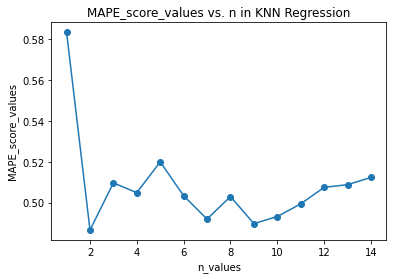

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
n_neighbors_values = np.arange(1, 15)

# Initialize an empty list to store the R2 values
MAPE_score_values = []

# Loop through each k value
for n in n_neighbors_values:
    # Define the KNN regression model
    modeloK = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    modeloK.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_modeloKNN_regression = modeloK.predict(X_diabetes_test)
    
    # Calculate the  MAPE score

    MAPE_modeloKNN_regression = mean_absolute_percentage_error(y_diabetes_test,y_pred_modeloKNN_regression)

    
    # Append the RMSE value to the list
    MAPE_score_values.append(MAPE_modeloKNN_regression)

# Plot the RMSE values against the k values
plt.plot(n_neighbors_values, MAPE_score_values, marker='o')
plt.xlabel('n_values')
plt.ylabel('MAPE_score_values')
plt.title('MAPE_score_values vs. n in KNN Regression')
plt.show()

#####  Errores MAE y MAPE [para el caso del modelo_R_regression para dataset de diabetes]

MAE [para el caso del modelo_R_regression_R10 para dataset de diabetes]

In [46]:
MAE_modelo_R_regression_R10 = mean_absolute_error(y_diabetes_test,y_pred_modeloR_regression_R10)
MAE_modelo_R_regression_R10

74.38625584874431

MAPE [para el caso del modelo_R_regression_R10 para dataset de diabetes]

In [47]:
MAPE_modelo_R_regression_R10 = mean_absolute_percentage_error(y_diabetes_test,y_pred_modeloR_regression_R10)
MAPE_modelo_R_regression_R10

0.8000483381217898

Evaluación de diferentes valores de MAPE score para diferentes valores de n_neighbors en el caso del modeloKNN_regression para dataset de diabetes

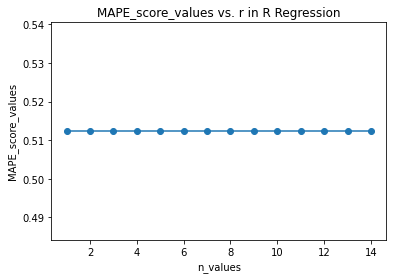

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
n_neighbors_values = np.arange(1, 15)

# Initialize an empty list to store the R2 values
MAPE_score_values = []

# Loop through each k value
for r in R_values:
    # Define the KNN regression model
    modeloR = RadiusNeighborsRegressor(radius=r)
    
    # Fit the model to the training data
    modeloR.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_modelo_R_regression = modeloK.predict(X_diabetes_test)
    
    # Calculate the  MAPE score

    MAPE_modelo_R_regression = mean_absolute_percentage_error(y_diabetes_test,y_pred_modelo_R_regression)

    
    # Append the RMSE value to the list
    MAPE_score_values.append(MAPE_modelo_R_regression)

# Plot the RMSE values against the k values
plt.plot(n_neighbors_values, MAPE_score_values, marker='o')
plt.xlabel('n_values')
plt.ylabel('MAPE_score_values')
plt.title('MAPE_score_values vs. r in R Regression')
plt.show()

#### En general el  modelo_KNN_Regression para dataset de diabetes tiene un R2 ~40% y MAPE de ~60%

### Para modelo Arbol_Regression  

Se definen y entrenan los modelos DecisionTreeRegressor(max_depth) & DecisionTreeRegressor(min_samples_leaf), además de calcular los valores predichos con cada uno de ellos
(con un max_depth=3 y min_samples_leaf=5, respecivamente)  [para el caso de dataset de diabetes]

In [52]:
from sklearn.tree import DecisionTreeRegressor

# Se define el arbol de regresión por Profundidad
arbolP_depth3 = DecisionTreeRegressor(max_depth=3)

# # Se define el arbol de regresión por Hojas
arbolH_Leaf3 = DecisionTreeRegressor(min_samples_leaf=5)



# Se entrena el arbol de regresión por Profundidad
arbolP_depth3 = arbolP_depth3.fit(X_diabetes_train,y_diabetes_train)

# # Se entrena el arbol de regresión por Hojas
arbolH_Leaf3 = arbolH_Leaf3.fit(X_diabetes_train,y_diabetes_train)

Se calculan los valores predichos para los modelos DecisionTreeRegressor(max_depth=3) & DecisionTreeRegressor(min_samples_leaf=5)

In [53]:
 
# Se aplica el  arbol de regresión por Profundidad (max_depth=3)

y_pred_arbolP_depth3 = arbolP_depth3.predict(X_diabetes_test)
y_pred_arbolP_depth3



# # Se aplica el  arbol de regresión por Hojas (max_depth=3)

y_pred_arbolH_Leaf3 = arbolH_Leaf3.predict(X_diabetes_test)
y_pred_arbolH_Leaf3


array([187.4       , 286.33333333,  66.55555556, 202.14285714,
       145.4       , 229.16666667,  85.6       , 123.875     ,
       217.33333333, 240.2       ,  85.6       , 152.28571429,
        45.83333333,  99.11111111, 135.625     , 113.75      ,
       193.8       , 135.33333333, 117.4       , 217.33333333,
        66.4       , 129.        , 145.4       , 229.16666667,
       147.2       , 117.4       ,  96.57142857,  74.66666667,
       202.14285714, 113.75      , 152.28571429, 217.33333333,
       202.14285714, 189.4       , 217.33333333, 300.33333333,
       202.14285714, 166.14285714, 129.        , 240.2       ,
        82.42857143, 113.75      ,  82.42857143, 220.5       ,
       279.6       , 147.2       , 113.75      ,  63.77777778,
       249.85714286,  92.22222222,  74.66666667,  74.66666667,
       113.75      , 222.2       , 217.33333333, 152.28571429,
       286.33333333,  66.4       , 217.55555556, 166.14285714,
       152.28571429,  74.66666667,  63.77777778,  66.55

##### Evaluación de Errores MAE y MAPE [DecisionTreeRegressor(max_depth=3) & DecisionTreeRegressor(min_samples_leaf=5)  para dataset de diabetes]

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

##### Evaluación de Errores MAE y MAPE [DecisionTreeRegressor(max_depth=3) para dataset de diabetes]

MAE [para el caso del DecisionTreeRegressor(max_depth=3) para dataset de diabetes]

In [61]:
MAE_arbolP_depth3 = mean_absolute_error(y_diabetes_test,y_pred_arbolP_depth3)
MAE_arbolP_depth3

55.456030104097735

MAPE [para el caso del DecisionTreeRegressor(max_depth=3) para dataset de diabetes]

In [62]:
MAPE_arbolP_depth3 = mean_absolute_percentage_error(y_diabetes_test,y_pred_arbolP_depth3)
MAPE_arbolP_depth3

0.5240636604070654

Vamos a graficar el resultado de arbolP_depth3

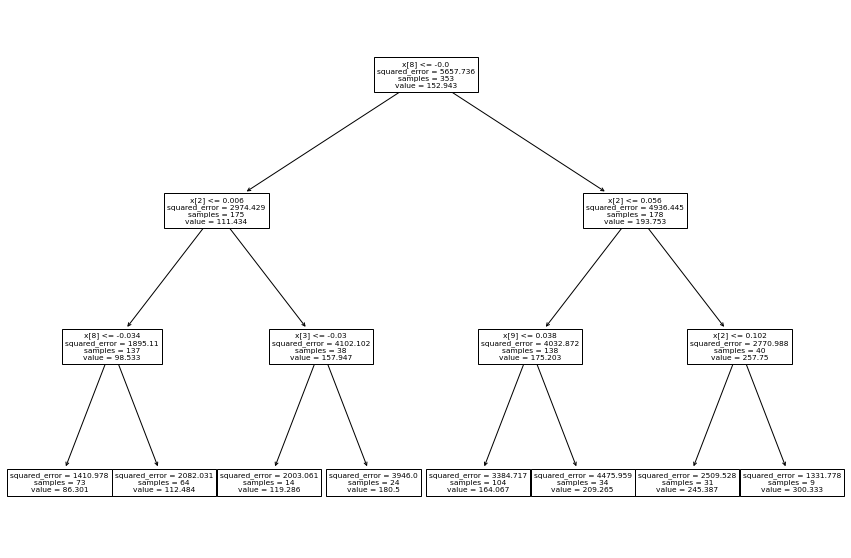

In [57]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(arbolP_depth3)
plt.show()

Para determinar la importancia de cada feature o característica Xj 

In [58]:
arbolP_depth3.feature_importances_

array([0.        , 0.        , 0.32310076, 0.0317303 , 0.        ,
       0.        , 0.        , 0.        , 0.5950418 , 0.05012714])

Denuevo se evidencía que los parámetros 'con mayor reelevancia' son el X[2]->bmi y X[8]->s5

Evaluación de diferentes valores de MAPE score para diferentes valores de max_depth_values en el caso del DecisionTreeRegressor(max_depth) para dataset de diabetes

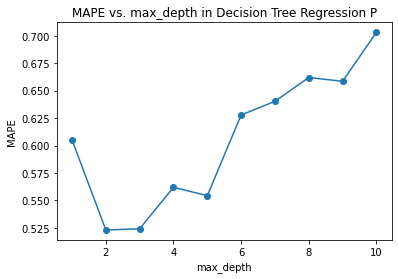

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the range of max_depth values
max_depth_values = np.arange(1, 11)

MAPE_score_values = []

# Loop through each max_depth value
for max_depth in max_depth_values:
    # Define the Decision Tree regression model
    arbolP = DecisionTreeRegressor(max_depth=max_depth)
    
    # Fit the model to the training data
    arbolP.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_arbolP = arbolP.predict(X_diabetes_test)
    
    # Calculate the  MAPE score

    MAPE_modelo_arbolP = mean_absolute_percentage_error(y_diabetes_test,y_pred_arbolP)

    
    # Append the RMSE value to the list
    MAPE_score_values.append(MAPE_modelo_arbolP)


# Plot the RMSE values against the max_depth values
plt.plot(max_depth_values, MAPE_score_values, marker='o')
plt.xlabel('max_depth')
plt.ylabel('MAPE')
plt.title('MAPE vs. max_depth in Decision Tree Regression P')
plt.show()

##### Evaluación de Errores MAE y MAPE [DecisionTreeRegressor(min_samples_leaf=5)  para dataset de diabetes]

MAE [para el caso del DecisionTreeRegressor(min_samples_leaf=5) para dataset de diabetes]

In [63]:
MAE_arbolH_Leaf3 = mean_absolute_error(y_diabetes_test,y_pred_arbolH_Leaf3)
MAE_arbolH_Leaf3

62.22387640449438

MAPE [para el caso del DecisionTreeRegressor(min_samples_leaf=5) para dataset de diabetes]

In [64]:
MAPE_arbolH_Leaf3 = mean_absolute_percentage_error(y_diabetes_test,y_pred_arbolH_Leaf3)
MAPE_arbolH_Leaf3

0.5833924226075836

Vamos a graficar el resultado de arbolH_Leaf3

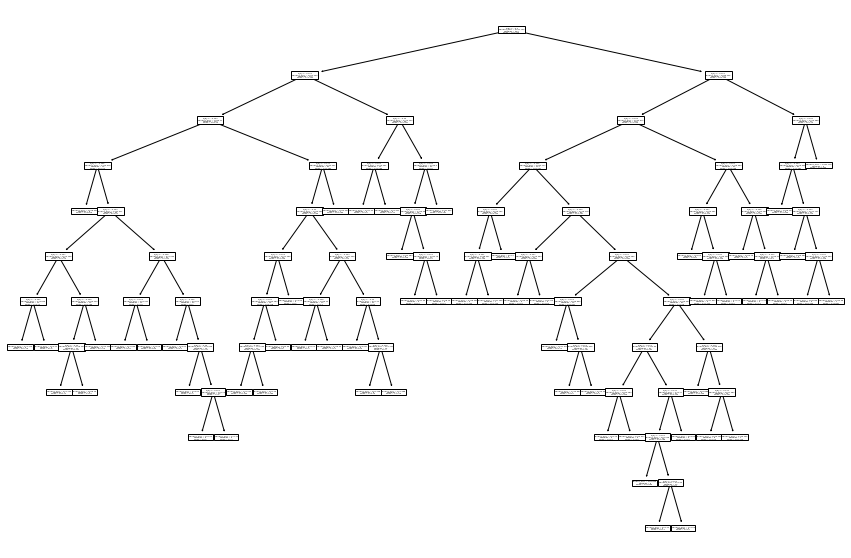

In [65]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(arbolH_Leaf3)
plt.show()

Para determinar la importancia de cada feature o característica Xj 

In [66]:
arbolH_Leaf3.feature_importances_

array([0.02707058, 0.01072897, 0.27282189, 0.07111367, 0.03254637,
       0.05314753, 0.03402995, 0.00333506, 0.42402385, 0.07118213])

Evaluación de diferentes valores de MAPE score para diferentes valores de max_depth_values en el caso del DecisionTreeRegressor(max_depth) para dataset de diabetes

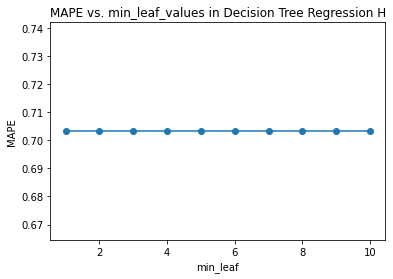

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the range of max_depth values
min_leaf_values = np.arange(1, 11)

MAPE_score_values = []

# Loop through each max_depth value
for l in min_leaf_values:
   
    # # Se define el arbol de regresión por Hojas
    arbolH = DecisionTreeRegressor(min_samples_leaf=l)
    
    # Fit the model to the training data
    arbolH.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_arbolH = arbolH.predict(X_diabetes_test)
    
    # Calculate the  MAPE score

    MAPE_modelo_arbolH = mean_absolute_percentage_error(y_diabetes_test,y_pred_arbolH)

    
    # Append the RMSE value to the list
    MAPE_score_values.append(MAPE_modelo_arbolP)


# Plot the RMSE values against the max_depth values
plt.plot(min_leaf_values, MAPE_score_values, marker='o')
plt.xlabel('min_leaf')
plt.ylabel('MAPE')
plt.title('MAPE vs. min_leaf_values in Decision Tree Regression H')
plt.show()

#### En general el  modelo DecisionTreeRegressor para dataset de diabetes tiene un R2 MAPE de ~70%

### Para modelo Bosque de Regression  

Se define y entrena el modelo RandomForestRegressor, además de calcular los valores predichos con un max_depth=3 y max_samples=0.8,max_features=0.8  [para el caso de dataset de diabetes]

In [69]:
from sklearn.ensemble import RandomForestRegressor

bosque_depth3 = RandomForestRegressor(n_estimators=100,max_depth=3,max_samples=0.8,max_features=0.8,random_state=2023)

bosque_depth3 = bosque_depth.fit(X_diabetes_train,y_diabetes_train)
bosque_depth3

RandomForestRegressor(max_depth=3, max_features=0.8, max_samples=0.8,
                      random_state=2023)

In [70]:
y_pred_bosque_depth3 = bosque_depth3.predict(X_diabetes_test)
y_pred_bosque_depth3

array([180.86979887, 243.61465806, 104.89149121, 173.72548023,
        98.54744708, 168.36695037,  98.30057669, 101.94040315,
       144.14459737, 196.36757919,  95.40394412, 103.00227812,
        89.56678232, 153.00692551, 142.77242662,  95.92571412,
       162.79213989, 106.8461969 , 196.26810472, 167.53637699,
        89.89504431, 169.70600722, 106.47883137, 143.20609245,
       114.23237513, 177.08554791, 152.22560636,  98.91000211,
       179.6689782 , 103.39110615, 108.21946387, 158.2409029 ,
       175.57762083, 172.16249254, 178.57456617, 244.8565336 ,
       205.12981012, 142.29014423, 169.3143694 , 194.67133787,
        89.28620239,  98.5918727 ,  98.63129897, 228.39803417,
       226.07250771,  95.45971645,  97.37627502, 100.72252483,
       233.57425637, 161.01844766, 106.69965262, 103.37224572,
       121.27214525, 170.39892158, 178.00757799, 117.62253569,
       217.84968763,  87.56505857, 238.47819829, 169.43794909,
       100.87888711,  90.9128537 ,  96.76874242, 100.19

##### Evaluación de Errores MAE y MAPE [RandomForestRegressor(n_estimators=100,max_depth=3,max_samples=0.8,max_features=0.8,random_state=2023)  para dataset de diabetes]

MAE [para el caso del RandomForestRegressorr(max_depth=3) para dataset de diabetes]

In [71]:
MAE_bosque_depth3 = mean_absolute_error(y_diabetes_test,y_pred_bosque_depth3)
MAE_bosque_depth3

51.8694618309945

MAPE [para el caso del RandomForestRegressorr(max_depth=3) para dataset de diabetes]

In [74]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE_bosque_depth3 = mean_absolute_percentage_error(y_diabetes_test,y_pred_bosque_depth3)
MAPE_bosque_depth3

0.5078452380857158

#### En general el  modelo RandomForestRegressorr para dataset de diabetes tiene un R2 MAPE de ~50%

### Para modelo SVM Regressor  

Se define y entrena el modelo SVM Regressor, además de calcular los valores predichos con un kernel='linear' y C=1,epsilon=0.1  [para el caso de dataset de diabetes]

In [77]:
C = 1

epsilon = 0.1

In [78]:
from sklearn.svm import SVR

modelo_SVR_1 = SVR(kernel='linear',C=C,epsilon=epsilon)

modelo_SVR_1  = modelo_SVR_1.fit(X_diabetes_train, y_diabetes_train)
modelo_SVR_1 

SVR(C=1, kernel='linear')

In [79]:
y_pred_modelo_SVR_1 =  modelo_SVR_1.predict(X_diabetes_test)
y_pred_modelo_SVR_1

array([141.16142052, 142.32579057, 140.25989767, 142.76386692,
       140.19668198, 141.14356162, 138.87410537, 138.44118373,
       139.90645335, 143.222742  , 138.07781353, 139.7503925 ,
       139.09443869, 141.21489481, 140.2818408 , 138.91719588,
       140.63206627, 139.42201909, 142.22942409, 141.5686484 ,
       139.59247696, 141.31900833, 140.41360063, 140.52876063,
       140.07182799, 141.77139681, 141.84417848, 139.61743389,
       142.8924248 , 140.03720538, 140.79327576, 139.75764971,
       142.77936736, 141.12844024, 141.16539279, 143.29879933,
       141.75441724, 140.14239803, 141.04895891, 142.89169429,
       138.67869661, 140.08784079, 139.67771271, 142.56644084,
       144.2892588 , 138.7843887 , 139.82456038, 139.22540754,
       143.78347949, 140.85953639, 140.62604909, 140.58004164,
       140.56588947, 141.59006568, 141.29374499, 141.67313326,
       142.57533492, 138.89291813, 142.99947135, 141.11320289,
       140.34066477, 138.12469758, 138.45048425, 139.89

##### Evaluación de Errores MAE y MAPE [SVR(kernel='linear',C=C,epsilon=epsilon)  para dataset de diabetes]

MAE [para el caso del SVR(kernel='linear') para dataset de diabetes]

In [80]:
MAE_modelo_SVR_1 = mean_absolute_error(y_diabetes_test,y_pred_modelo_SVR_1)
MAE_modelo_SVR_1

72.68067620828649

MAPE [para el caso del SVR(kernel='linear') para dataset de diabetes]

In [81]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE_modelo_SVR_1 = mean_absolute_percentage_error(y_diabetes_test,y_pred_modelo_SVR_1)
MAPE_modelo_SVR_1

0.7216118287893843

#### En general el  modelo SVM Regressor para dataset de diabetes tiene un R2 MAPE de ~70%